# Logical Operations

Logical operations are often used with binary masks to process selective portions of an image. In this notebook we will cover:

+ Introduction to logical operators
+ Bitwise operations on images: AND, NOR, OR, XOR
+ Logo manipulation example

The logical operation applies to each bit individually.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
plt.rcParams["image.cmap"] = "gray"

## Bitwise Operations on Images

The four functions that OpenCV allow us to perform these operations are:

1. bitwise_and()
2. bitwise_not()
3. bitwise_or()
4. bitwise_xor()

The syntax is the same for each of these, the first two required arguments are two images of the same size.

(200, 499)


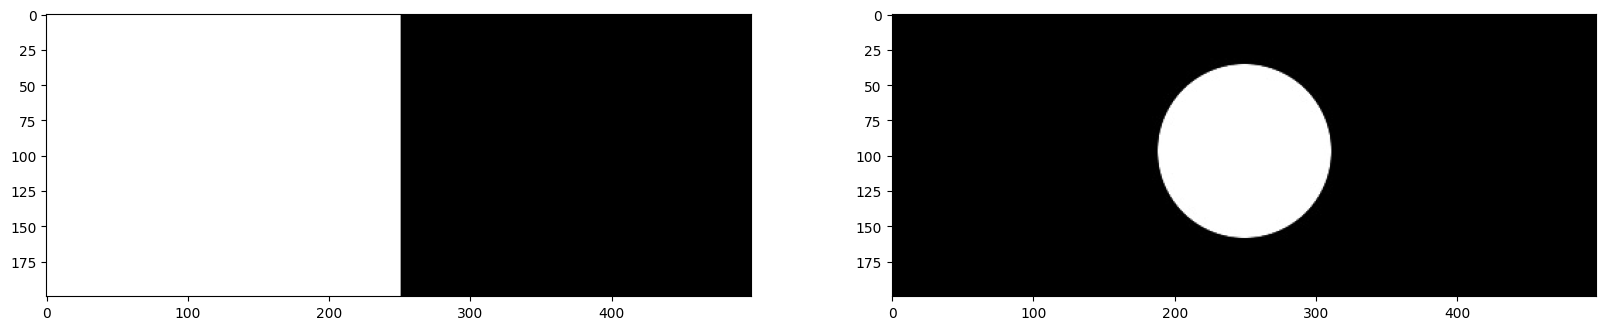

In [2]:
img_rec = cv2.imread("../module02/rectangle.jpg", cv2.IMREAD_GRAYSCALE)
img_cir = cv2.imread("../module02/circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20, 5))
plt.subplot(121); plt.imshow(img_rec)
plt.subplot(122); plt.imshow(img_cir)
print(img_rec.shape)

### Bitwise AND Operator
The **bitwise_and()** function will return

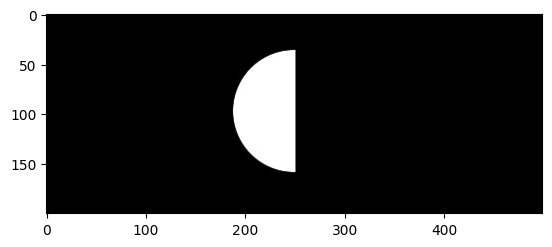

In [3]:
result = cv2.bitwise_and(img_rec, img_cir, mask=None)

plt.imshow(result);

### Bitwise OR Operator

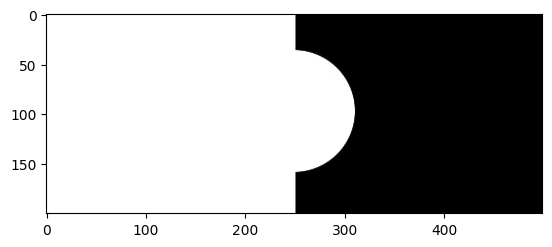

In [4]:
result = cv2.bitwise_or(img_rec, img_cir, mask=None)

plt.imshow(result);

### Bitwise XOR Operator

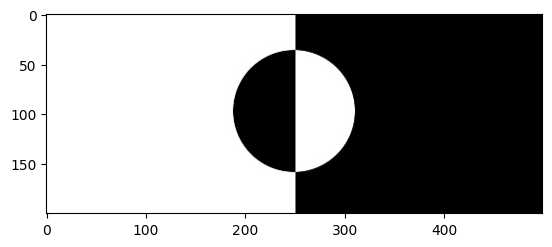

In [5]:
result = cv2.bitwise_xor(img_rec, img_cir, mask=None)

plt.imshow(result);

## Example Application: Logo Manipulation

(500, 500, 3)


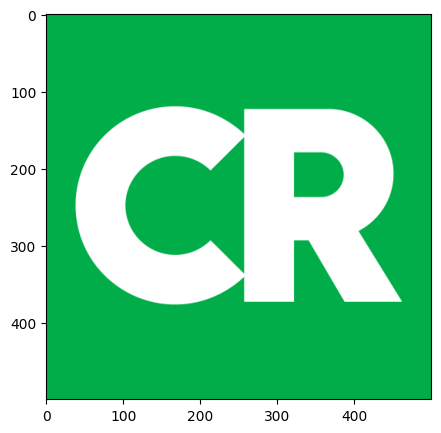

In [6]:
# Read the image of color CR logo (foreground).
img_logo = cv2.imread("../module02/CR_Logo.png", cv2.IMREAD_COLOR)

# Print the image shape.
print(img_logo.shape)
logo_w = img_logo.shape[0]
logo_h = img_logo.shape[1]

# Display the image.
plt.figure(figsize=(5, 5))
plt.imshow(img_logo[:, :, ::-1]);

In [7]:
# Read the image of color checkboard (background).
img_background = cv2.imread("../module02/checkerboard_color.png", cv2.IMREAD_COLOR)

# Print the image shape.
print(img_background.shape)

(900, 900, 3)


(500, 500, 3)


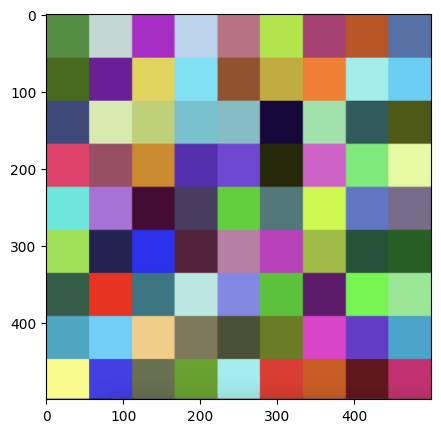

In [8]:
# Resize the background image and display it.
# Set the dimension of the background image to be the same as the logo.
dim = (logo_w, logo_h)

# Resize the background image to the same size as logo image.
img_background = cv2.resize(img_background, (dim), interpolation=cv2.INTER_AREA)

# Print the image shape to confirm it's the same size as the logo.
print(img_background.shape)

# Display the image.
plt.figure(figsize=(5, 5))
plt.imshow(img_background[:, :, ::-1]);

(500, 500)

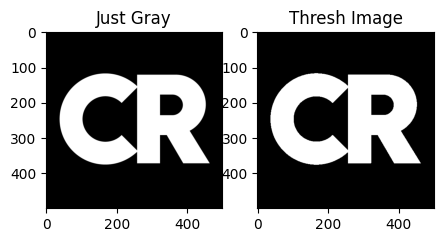

In [9]:
# Create a mask of the logo image.
# Convert the image to grayscale.
img_logo_gray = cv2.cvtColor(img_logo, cv2.COLOR_BGR2GRAY)

# Apply global thserholding to create a binary mask of the logo.
retval, image_logo_mask = cv2.threshold(img_logo_gray, 127, 255, cv2.THRESH_BINARY)

# Print the image shape.
print(image_logo_mask.shape);

# Display the image.
plt.figure(figsize=(5, 5))
plt.subplot(121); plt.imshow(img_logo_gray); plt.title("Just Gray")
plt.subplot(122); plt.imshow(image_logo_mask); plt.title("Thresh Image");

(500, 500, 3)


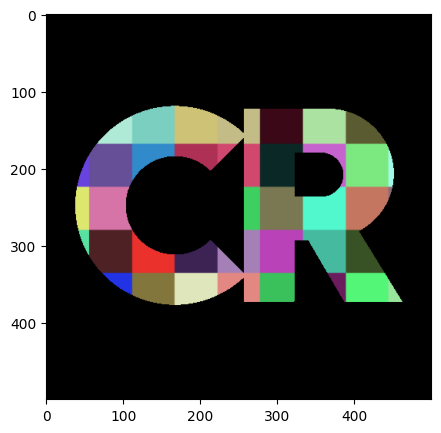

In [11]:
# Apply the mask to the background image.
# This function return the background image but only for the white portions of the mask.
# Create colorful checkboard background 'behind' the logo lettering.
img_background = cv2.bitwise_and(img_background, img_background, mask=image_logo_mask)

# Print the image shape.
print(img_background.shape);

# Display the image.
plt.figure(figsize=(5, 5))
plt.imshow(img_background);

(500, 500)


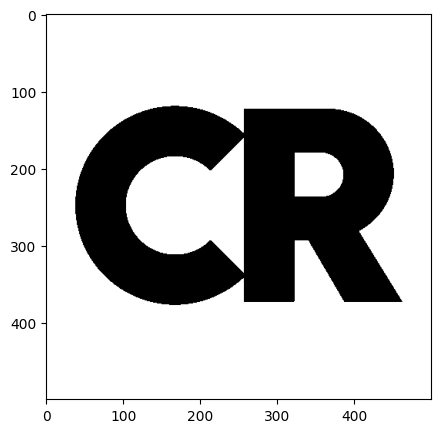

In [12]:
# Invert the mask.
# Create an inverse mask.
img_logo_mask_inv = cv2.bitwise_not(image_logo_mask)

# Print the image shape.
print(img_logo_mask_inv.shape);

# Display the image.
plt.figure(figsize=(5, 5))
plt.imshow(img_logo_mask_inv);

(500, 500, 3)


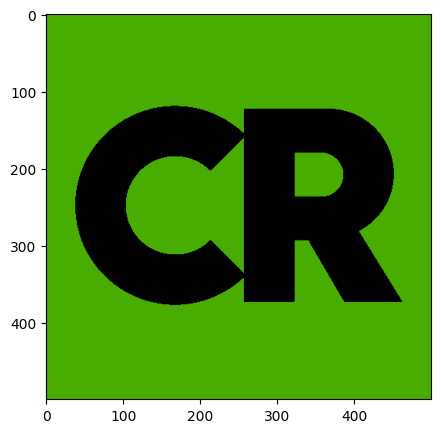

In [17]:
# Isolate the foreground using the inverse mask.
img_foreground = cv2.bitwise_and(img_logo, img_logo, mask=img_logo_mask_inv)

# Print the image shape.
print(img_foreground.shape);

# Display the image.
plt.figure(figsize=(5, 5))
plt.imshow(img_foreground);

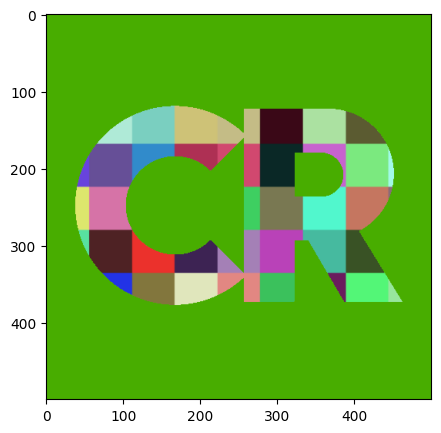

In [18]:
# Final result: Add the Foreground and Background
# Add the two previous results to obtain the final result.
result = cv2.add(img_background, img_foreground)

# Display the image and save the result to the file system.
plt.figure(figsize=(5, 5))
plt.imshow(result)
cv2.imwrite("logo_final.png", result[:, :, ::-1]);

## Exercise

yellow square: (600, 600, 3)
gray circle: (1000, 1000, 3)


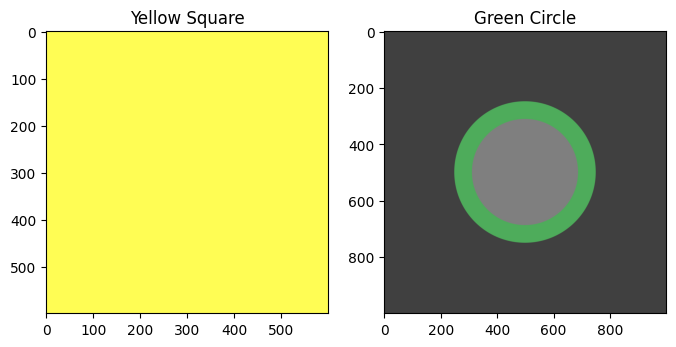

In [19]:
img_yellow_square = cv2.imread("../module02/yellow_square.png", cv2.IMREAD_COLOR)
img_green_circle = cv2.imread("../module02/green_circle.png", cv2.IMREAD_COLOR)

print(f"yellow square: {img_yellow_square.shape}")
print(f"gray circle: {img_green_circle.shape}")

plt.figure(figsize=(8, 8))
plt.subplot(121); plt.imshow(img_yellow_square[:, :, ::-1]); plt.title("Yellow Square")
plt.subplot(122); plt.imshow(img_green_circle[:, :, ::-1]); plt.title("Green Circle");

In [20]:
# Resize the yellow square
dim = (img_green_circle.shape[1], img_green_circle.shape[0])

# Resize the yellow square.
img_yellow_square = cv2.resize(img_yellow_square, dim, interpolation=cv2.INTER_AREA)

print(f"yellow square: {img_yellow_square.shape}")
print(f"green circle: {img_green_circle.shape}")

yellow square: (1000, 1000, 3)
green circle: (1000, 1000, 3)


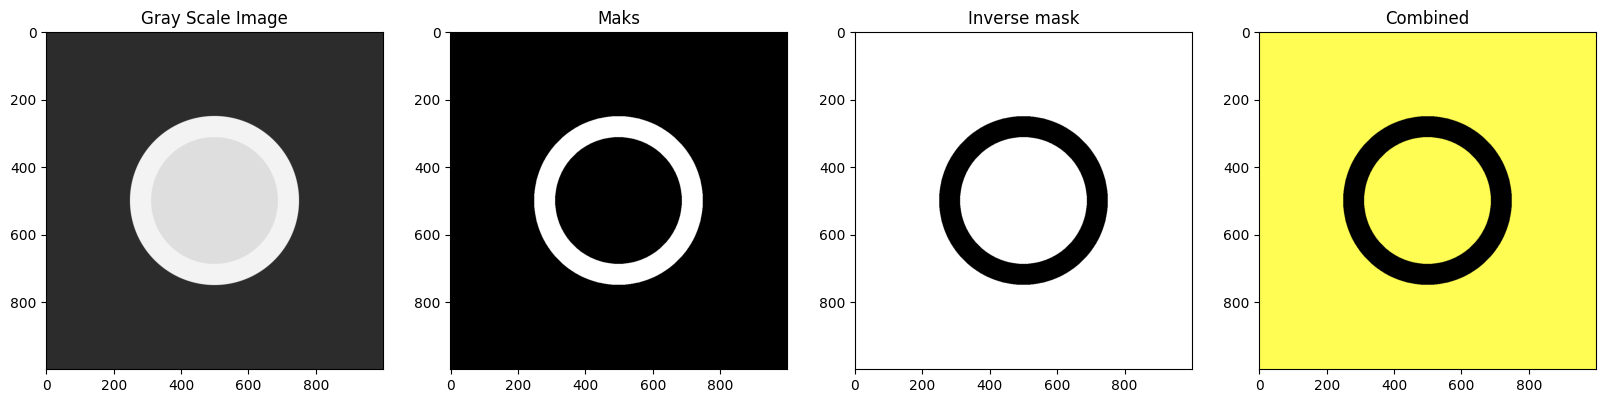

In [30]:
img_gray_circle = cv2.cvtColor(img_green_circle, cv2.COLOR_BGR2GRAY)
retval, binary_circle = cv2.threshold(img_gray_circle, 130, 255, cv2.THRESH_BINARY)
binary_circle_inv = cv2.bitwise_not(binary_circle)
yellow_whithin_circle = cv2.bitwise_and(img_yellow_square, img_yellow_square, mask=binary_circle_inv)

plt.figure(figsize=(20, 10))
plt.subplot(141); plt.imshow(img_gray_circle); plt.title("Gray Scale Image")
plt.subplot(142); plt.imshow(binary_circle); plt.title("Maks")
plt.subplot(143); plt.imshow(binary_circle_inv); plt.title("Inverse mask")
plt.subplot(144); plt.imshow(yellow_whithin_circle[:, :, ::-1]); plt.title("Combined");